# Analyzing MG scaling for different levels
Jan 3, 2022

Venkitesh Ayyar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob
import subprocess as sp

In [2]:
from ipywidgets import *

In [3]:
%matplotlib widget

In [4]:
# # Load data

def f_get_data(fname): # Modified for complex field
    
    def f_conv_complex(strg):
        ''' Convert input from a+ib to python complex form'''
        arr=[np.float64(k) for k in strg.split('+i')]
        return complex(arr[0],arr[1])
    
    arr=np.loadtxt(fname,delimiter=',',dtype=str)
    
    arr_iters=arr[:,0].astype(int) # First element is iteration number
    
    arr1=np.vectorize(f_conv_complex)(arr[:,1:-1]) # Skip last element (null string) and first (iteration)
    del(arr)
    # print(arr1.shape)
    L=int(np.sqrt(arr1.shape[1])) # Get lattice size
    num=arr1.shape[0]
    # print(L)
    # a3=arr1.reshape(134,L,L) :  simple reshape doesn't do it in the correct order
    ## Reshape to 2D image
    arr2=np.empty((num,L,L),dtype=complex)
    for i in range(num): 
        for x in range(L):
            for y in range(L):
                arr2[i,x,y]=arr1[i,x+y*L]

    print(arr2.shape)
    
    return arr2

def f_rescale(arr,mean):
    a1=np.array([abs(i-mean) for i in arr])
    a1=np.abs(a1)
    return a1

# _=f_get_data(fname)
# f_rescale(arr_lst[0][:5],soln)

In [5]:
fldr='../results_data/MG_performance/'
file_lst=glob.glob(fldr+'results_residue*')

In [6]:
dict1={}
df_data=pd.DataFrame()

for fle in file_lst[:]:
    fname=fle
    lvls=int(fle.split('/')[-1].split('lvls')[-1].split('.txt')[0])
    L=int(fle.split('_L')[-1].split('_m')[0])
    
    arr=f_get_data(fname)
    res_mag=np.array([np.linalg.norm(arr[i,:,:].flatten()) for i in range(arr.shape[0])])

    iters=arr.shape[0]
    dict1={'L':L,'lvls':lvls,'iters':iters,'res_mag_arr':res_mag,'fname':fle}
    
    df_data=df_data.append(dict1,ignore_index=True).sort_values(by=['L','lvls'])
    
    

(267, 32, 32)
(586, 32, 32)
(5768, 32, 32)
(1463, 32, 32)
(129, 32, 32)


In [7]:
df_data[['L','lvls','iters','res_mag_arr']]

,L,lvls,iters,res_mag_arr
0,32.0,0.0,5768.0,"[264.72826763752715, 14.662960334717543, 6.647..."
1,32.0,1.0,1463.0,"[264.72826763752715, 4.521627163882988, 2.6882..."
2,32.0,2.0,586.0,"[264.72826763752715, 3.288219139380207, 1.7445..."
3,32.0,3.0,267.0,"[264.72826763752715, 3.094106893900951, 1.5224..."
4,32.0,4.0,129.0,"[264.72826763752715, 3.0727252141678707, 1.460..."


## Variation of Iteration count vs number of MG levels

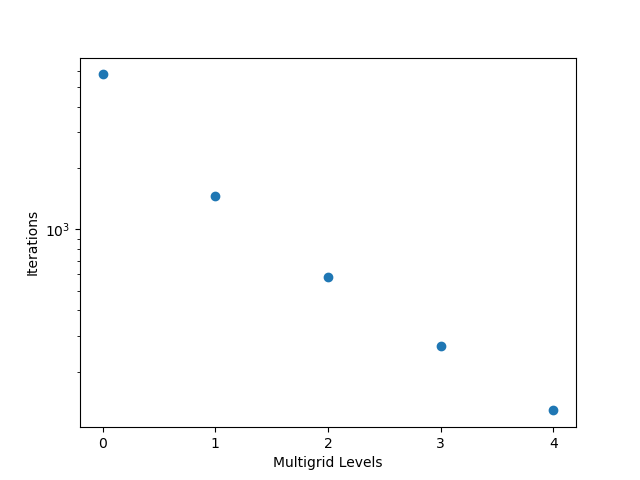

In [8]:

def f_plot_iters(df,L):
    df=df[(df.L==L)]
    plt.figure()

    x=df.lvls.values
    y=df.iters.values
    plt.plot(x,y,marker='o',linestyle='')
    
    plt.yscale('log')
    plt.xticks(x)
    
    plt.ylabel("Iterations")
    plt.xlabel("Multigrid Levels")
    
    plt.show()

f_plot_iters(df_data,32)

## Magnitude of residue

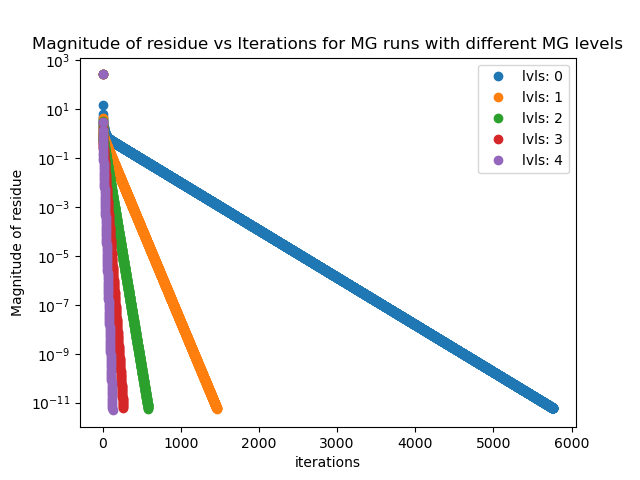

In [9]:

def f_plot_res_mag(df,L):
    
    df=df[df.L==L]    
    plt.figure()
    
    for lvl in df.lvls.values:
        df1=df[df.lvls==lvl]
        
        y=df1.res_mag_arr.values[0]
        plt.plot(y,marker='o',linestyle='',label='lvls: '+str(int(lvl)))

    plt.yscale('log')
    plt.title("Magnitude of residue vs Iterations for MG runs with different MG levels")
    
    plt.ylabel("Magnitude of residue")
    plt.xlabel("iterations")
    plt.legend()
    plt.show()
    
f_plot_res_mag(df_data,L=32)